# 1. 매개변수 갱신

- 최적화(optimization): 손실함수의 값을 가능한 한 낮추는 매개변수 찾기

5장까지 소개된 방법은 `확률적 경사 하강법(SGD)`을 이용한다.
그러나 `SGD`보다 효율적일 수 있는 방법들을 아래 더 소개한다.

## 1-1. 목적
SGD의 전략: `현재 위치`에서 가장 기울어진 방향으로 가기

## 1-2. 확률적 경사 하강법(SGD)
$$W<-W-\eta\frac{\partial L}{\partial W}$$
- W: 갱신할 가중치 매개변수
- $\frac{\partial L}{\partial W}$: W에 대한 손실 함수의 기울기
- $\eta$: learning rate

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr # learning rate

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

## 1-3. SGD의 단점
SGD는 `비등방성(anistropy)` 함수에서는 탐색 경로가 비효율적이다.
- 비등방성(anisotropy): 방향에 따라 물리적 성질이 바뀌는 것. 즉, 특정한 방향으로 보면 다른 성질이 있을 수 있다.
- 등방성: 어느 방향에서 보아도 같은 성질을 가지는 것.

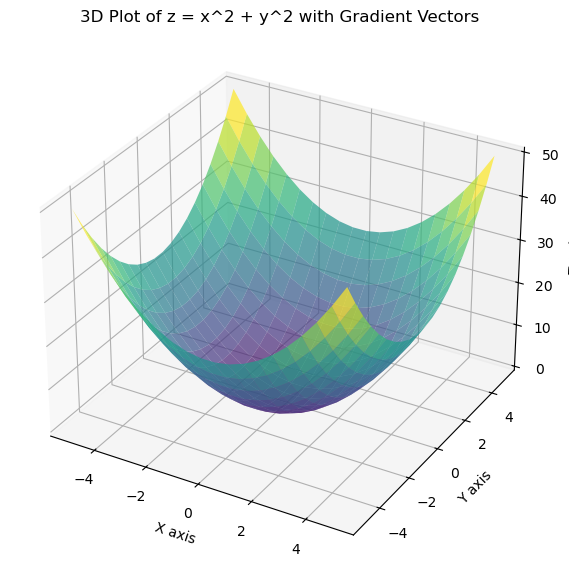

In [4]:
# 등방성
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# range of x, y
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# calc slope
dx,dy = np.gradient(Z)

# Graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of z = x^2 + y^2 with Gradient Vectors')

plt.show()


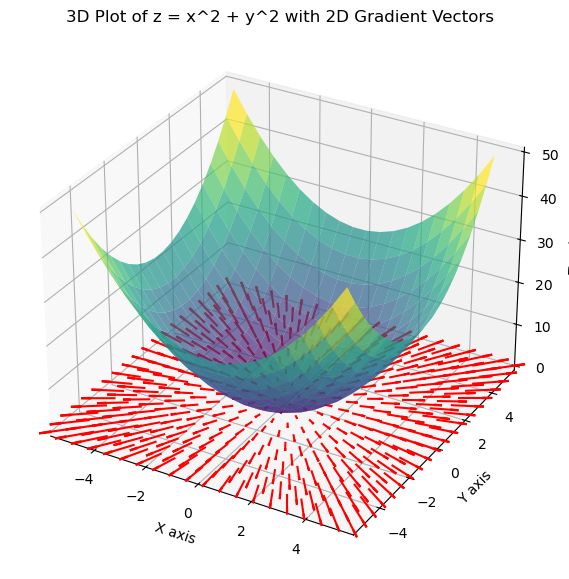

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# X, Y 축의 범위와 좌표 생성
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# 기울기 계산 (수식을 직접 사용)
dx = 2 * X
dy = 2 * Y

# 3차원 그래프 그리기
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# 2차원 화살표로 기울기 시각화 (z=0 평면에서 그리기)
ax.quiver(X, Y, 0, dx, dy, 0, color='red', length=0.1, normalize=False, arrow_length_ratio=0.3)

# 그래프 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of z = x^2 + y^2 with 2D Gradient Vectors')

plt.show()


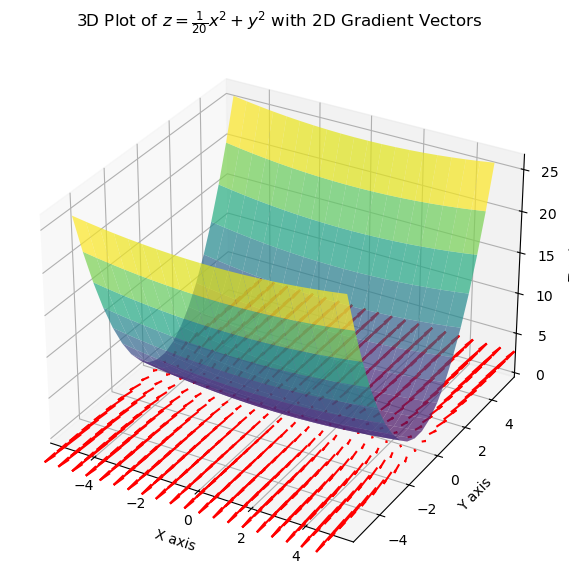

In [18]:
# 비등방성
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# X, Y 축의 범위와 좌표 생성
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = (1/20) * X**2 + Y**2

# 기울기 계산 (수식을 직접 사용)
dx = (1/10) * X  # x 방향 편미분
dy = 2 * Y       # y 방향 편미분

# 3차원 그래프 그리기
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# 2차원 화살표로 기울기 시각화 (z=0 평면에서 그리기)
ax.quiver(X, Y, 0, dx, dy, 0, color='red', length=0.2, normalize=False, arrow_length_ratio=0.3)

# 그래프 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title(r'3D Plot of $z = \frac{1}{20}x^2 + y^2$ with 2D Gradient Vectors')

plt.show()


/tmp/ipykernel_4999/956824390.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


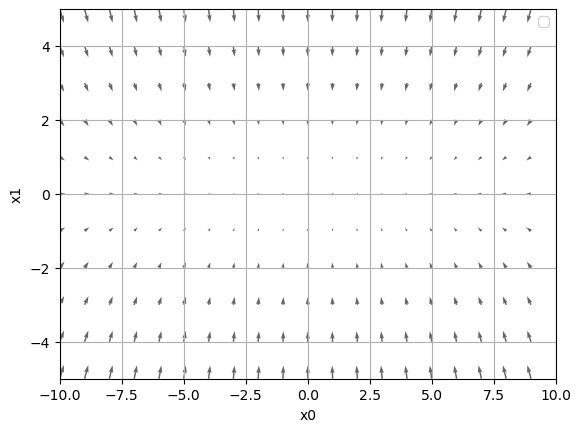

In [56]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad
    
# f(x, y) = (1/20) * x**2 + y**2 의 기울기
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
     
x0 = np.arange(-10, 10, 1)
x1 = np.arange(-10, 10, 1)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([(1/(20**0.5))*X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

위 시각화 그래프에서 볼 수 있듯이 차이는
- 비등방성 함수는 특정 한 지점을 가리키지 않음
- y축 기울기는 큰데 x축은 완만하다(비등방적)

SGD가 위와 같은 비등방성 함수에서 비효율적으로 작동하는 것은  
SGD는 `기울기가 가리키는 방향`으로 `무조건` 이동하므로

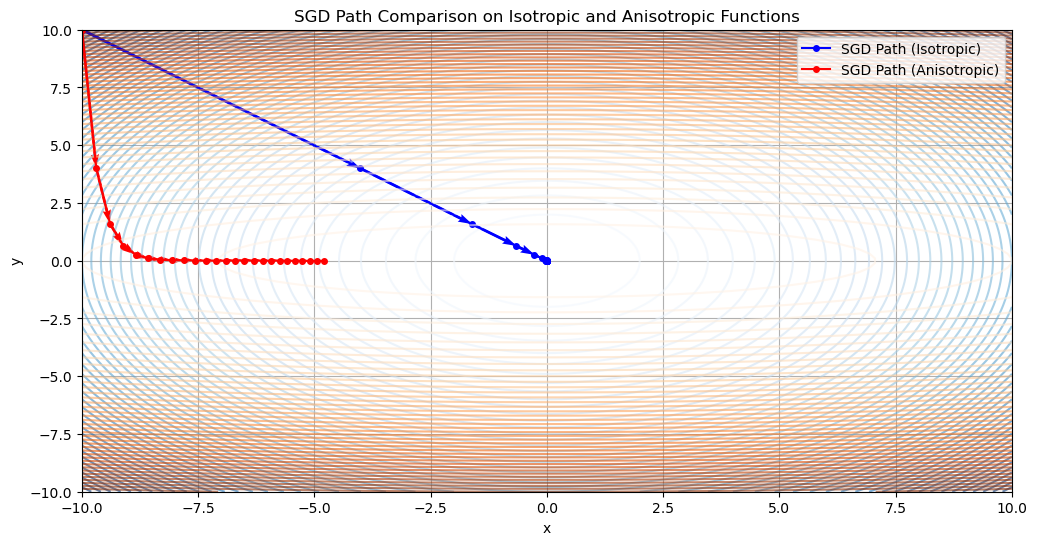

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 등방성 함수와 그 기울기 정의
def isotropic_function(x, y):
    return x**2 + y**2

def isotropic_gradient(x, y):
    dx = 2 * x  # x 방향 편미분
    dy = 2 * y  # y 방향 편미분
    return dx, dy

# 비등방성 함수와 그 기울기 정의
def anisotropic_function(x, y):
    return (1/20) * x**2 + y**2

def anisotropic_gradient(x, y):
    dx = (1/10) * x  # x 방향 편미분
    dy = 2 * y       # y 방향 편미분
    return dx, dy

# SGD 경로 생성 함수
def sgd_path(function, gradient, start_x, start_y, learning_rate, steps, noise_level=0.05):
    x, y = start_x, start_y
    path_x, path_y, path_z = [x], [y], [function(x, y)]

    for _ in range(steps):
        dx, dy = gradient(x, y)
        # 작은 무작위 노이즈를 추가하여 지그재그 경로를 생성
        x -= learning_rate * (dx + np.random.normal(0, noise_level))
        y -= learning_rate * (dy + np.random.normal(0, noise_level))
        
        path_x.append(x)
        path_y.append(y)
        path_z.append(function(x, y))
    
    return path_x, path_y, path_z

# 시각화 설정
np.random.seed(0)
start_x, start_y = -10.0, 10.0  # 시작점
learning_rate = 0.3
steps = 24
noise_level = 0.02  # 노이즈 레벨을 낮춤

# 등방성 함수에서 SGD 경로 생성
iso_path_x, iso_path_y, iso_path_z = sgd_path(isotropic_function, isotropic_gradient, start_x, start_y, learning_rate, steps, noise_level)

# 비등방성 함수에서 SGD 경로 생성
anisotropic_path_x, anisotropic_path_y, anisotropic_path_z = sgd_path(anisotropic_function, anisotropic_gradient, start_x, start_y, learning_rate, steps, noise_level)

# 큰 범위 설정
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# 등방성 함수의 등고선
Z_iso = isotropic_function(X, Y)
plt.figure(figsize=(12, 6))
plt.contour(X, Y, Z_iso, levels=50, cmap='Blues', alpha=0.6)
plt.plot(iso_path_x, iso_path_y, 'bo-', markersize=4, label='SGD Path (Isotropic)')
plt.quiver(iso_path_x[:-1], iso_path_y[:-1], np.diff(iso_path_x), np.diff(iso_path_y), angles='xy', scale_units='xy', scale=1, color='blue', width=0.003)

# 비등방성 함수의 등고선
Z_aniso = anisotropic_function(X, Y)
plt.contour(X, Y, Z_aniso, levels=50, cmap='Oranges', alpha=0.6)
plt.plot(anisotropic_path_x, anisotropic_path_y, 'ro-', markersize=4, label='SGD Path (Anisotropic)')
plt.quiver(anisotropic_path_x[:-1], anisotropic_path_y[:-1], np.diff(anisotropic_path_x), np.diff(anisotropic_path_y), angles='xy', scale_units='xy', scale=1, color='red', width=0.003)

# 설정
plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD Path Comparison on Isotropic and Anisotropic Functions')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()


교재에서는 경로가 심하게 지그재그로 이동하는 것을 보여주는데, 그것은 학습률을 극단적으로 높여야 해당 경로가 잘 보인다.   
위 상황에서는 같은 학습률과 스텝 수에서 등방성 함수는 빠르게 최적점에 도달했지만, 비등방성 함수에서는 그렇지 못함을 시각화한다.   
~~결론: 딴 거 쓰자~~

## 1-4. 모멘텀(Momentum)
### 물리학의 모멘텀(Momentum, 운동량)
- 외부에서 힘을 받지 않는 한 정지해 있거나 운동 상태를 지속하려는 성질.
- `관성`을 생각하면 됨.
 $$ {\displaystyle {\vec {F}}={\frac {\mathrm {d} }{\mathrm {d} t}}(m{\vec {v}})} $$
### 기계학습에서의 모멘텀
비유하자면 `관성`을 이용한 방법이다. SGD에서 계산된 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영한다. 즉, 이전에 이동했던 방향과 기울기를 고려하여 어느정도 추가로 이동시키는 것.
$$v <- \alpha - \eta\frac{\partial L}{\partial W}$$
$$ W <- W + v$$

- W: 가중치 매개변수
- $\frac{\partial L}{\partial W}$: Loss function of W의 기울기
- $\eta$: Learning Rate
- v: velocity(속도)

### 장점
- 결과적으로 경로의 지그재그가 SGD보다 덜하다.
  - x축 기울기는 작고 y축은 크다.
  - 따라서 x축 힘은 작지만 방향이 변하지 않으므로 한 방향으로 가속한다.
  - y축은 크지만 방향이 변한다(지그재그) 관성에 의해 이 영향을 줄인다.
  - x축의 영향이 상대적으로 강해져, x축 방향으로 보다 빠르게 다가간다.
- 관성에 의해 Local minimum에서 멈추는 게 아니라 일부 이동하면서 Local minimum != Global minimum인 상황에서 Local minimum에서 탈출할 여지가 존재함.

In [52]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr # learning rate
        self.momentum = momentum
        self.v = None # velocity

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

## 1-5. AdaGrad
학습률의 적절한 선택은 중요한 문제다.
이 값이 작으면 학습이 너무 길어지고, 반대로 크면 발산해서 학습이 망한다.   ~~아까 시각화할때 지그재그를 보여주려고 했는데, 그러면 발산해서 0으로 제대로 가지 않는 이슈가 있었다~~   

따라서 학습률 관련한 최적화 방법으로 `학습률 감소(learning rate decay)`가 있는데, 학습을 진행하면서 학습률을 줄여가는 것이다.   

이에 사용할 수 있는 방법이 `AdaGrad`.   
parameter들은 각자 의미하는 바가 다른데 모든 parameter들에 동일한 학습률을 적용하는 것은 바람직하지 못한다. 따라서 각 parameter들에 서로 다른 학습률을 적용하는 학습률 감소로 보면 되겠다.

$$h <- h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}$$
$$ W <- W- \eta\frac{1}{\sqrt{h}}\frac{\partial L}{\partial W}$$
- h: 기존 기울기 값을 제곱하여 계속 더해줌
- h가 학습률 조정에 쓰이게 되는데 $\frac{1}{\sqrt{h}}$로 반영이 되므로 많이 움직인 것이 학습률이 낮아진다는 수식적 의미임

In [48]:

class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

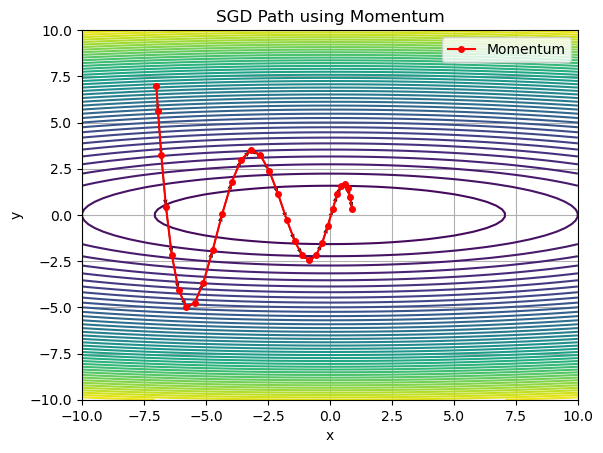

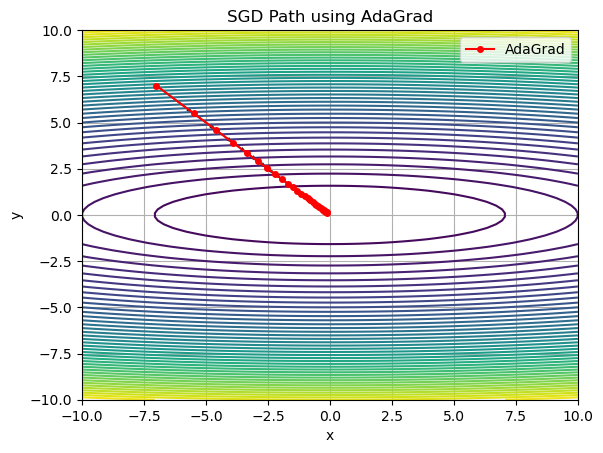

In [53]:
def function(x, y):
    return 0.05 * x**2 + y**2

def gradient(x, y):
    return 0.1 * x, 2 * y  # 기울기
    
def plot_optimization_path(optimizer, title):
    params = {'x': -7.0, 'y': 7.0}  # 초기 값
    path_x, path_y = [params['x']], [params['y']]

    for _ in range(30):
        grads = {}
        grads['x'], grads['y'] = gradient(params['x'], params['y'])
        optimizer.update(params, grads)
        
        path_x.append(params['x'])
        path_y.append(params['y'])

    # 등고선 그리기
    x_vals = np.linspace(-10, 10, 100)
    y_vals = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = function(X, Y)

    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.plot(path_x, path_y, 'o-', color='red', markersize=4, label=title)
    plt.quiver(path_x[:-1], path_y[:-1], np.diff(path_x), np.diff(path_y), angles='xy', scale_units='xy', scale=1, color='black', width=0.003)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'SGD Path using {title}')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

# 모멘텀과 AdaGrad로 최적화 경로 시각화
momentum_optimizer = Momentum(lr=0.1, momentum=0.9)
adagrad_optimizer = AdaGrad(lr=1.5)

plot_optimization_path(momentum_optimizer, "Momentum")
plot_optimization_path(adagrad_optimizer, "AdaGrad")


## 1-6. Adam
그냥 Momentum + AdaGrad

In [54]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)



## 1-7, 1-8. 선택 가이드
결과적으로는 하이퍼파라미터인 학습률, 레이어 개수에 따라 다 다르다.
그러나 일반적으로는 SGD보다 세 방법이 성능이 좋다.

# 2. 가중치의 초깃값
## 2-1. 0으로 초기화

`가중치 감소(weight decay)`: 가중치 매개변수의 값이 작아지도록 학습하는 것. -> 오버피팅 방지      
따라서 가중치를 작게 하기 위해 초깃값도 최대한 줄이자는 게 시작점이다.
그래서 극단적으로 0으로 초기화해버리면 어떻게 되는가?   
**결과적으로는 그러면 안된다!**   
그러면 오차역전파법에서 모든 가중치 값이 똑같이 갱신된다.   
예시) 2층 신경망   
- Layer1: 0
- Layer2: 0
- 두 입력층의 가중치가 0이므로 두번째 뉴런에 모두 같은 값 전달
따라서 이는 가중치를 여러 개 갖는 의미를 없어지게 하는 것

## 2-2. 은닉층의 활성화값 분포
가중치의 초기값에 따라 은닉층 활성화값들이 어떻게 변화하는지 실험할 수 있다.

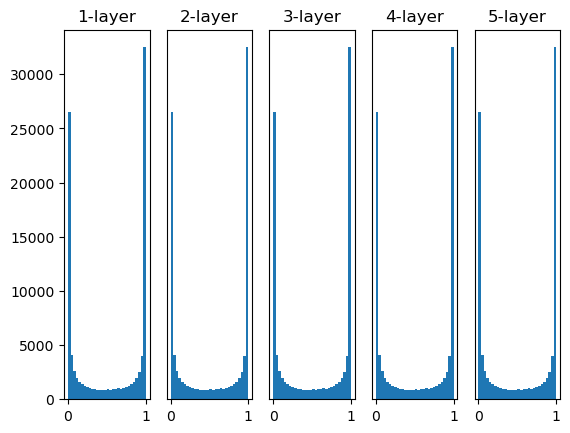

In [60]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w0 = np.random.randn(node_num, node_num) * 1
    w1 = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a0 = np.dot(x, w0)
    a1 = np.dot(x, w1)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a0 in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))

plt.show()

각 층의 활성화값들이 0과 1에 치우쳐있다.   
`기울기 소실(gradient vanishing)`: sigmoid함수가 출력이 0 또는 1에 가까워지면 derivative이 0에 다가간다. 따라서 역전파 기울기 값이 점점 작아지다 소실된다. 결과적으로 학습이 잘 되지 않을 것.

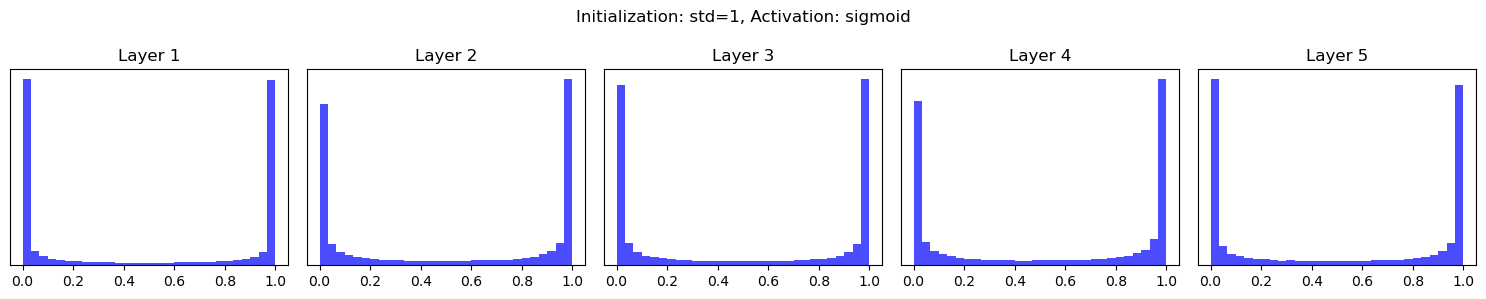

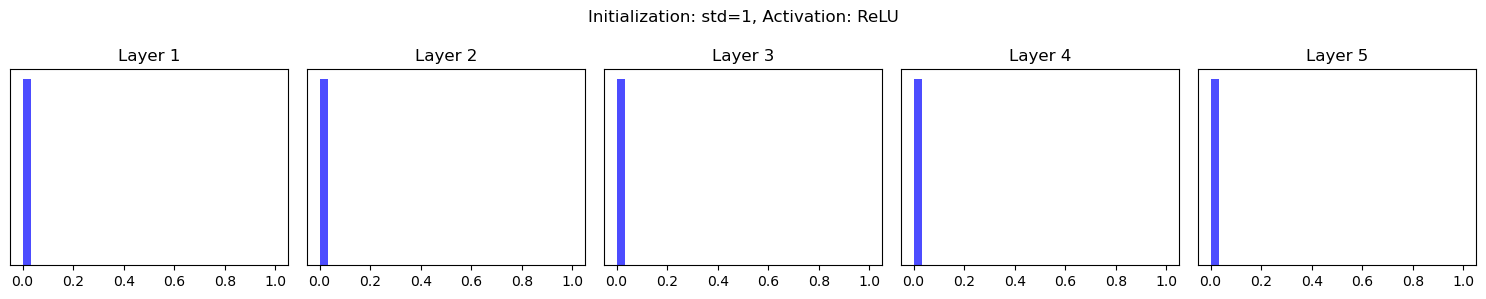

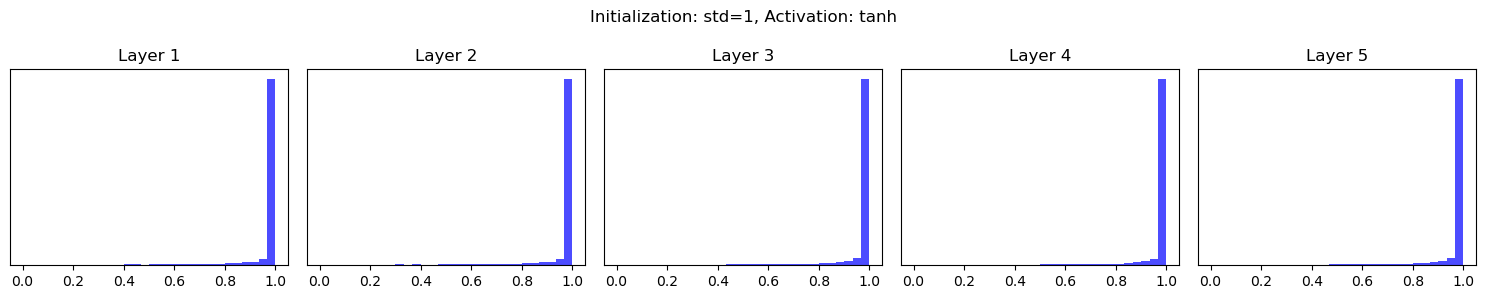

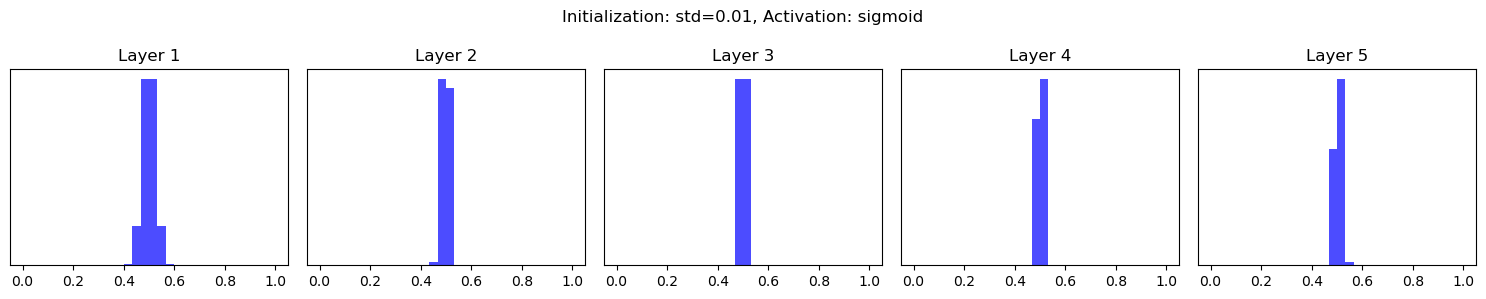

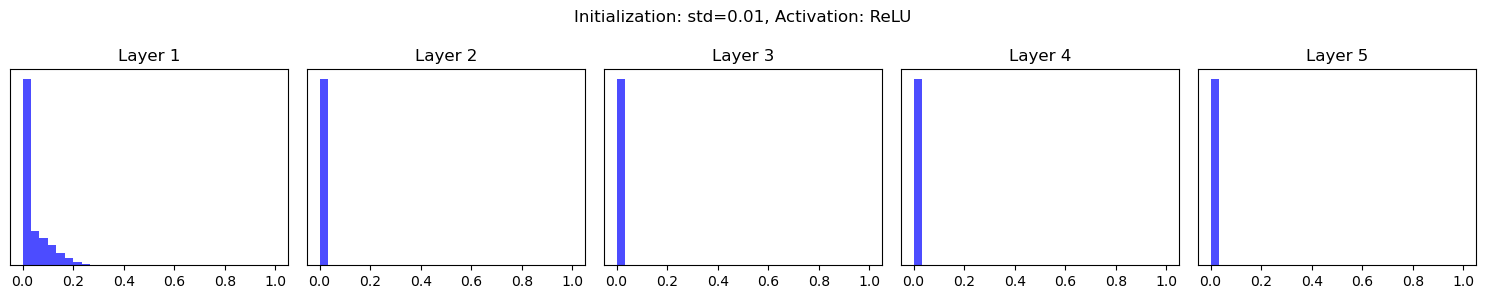

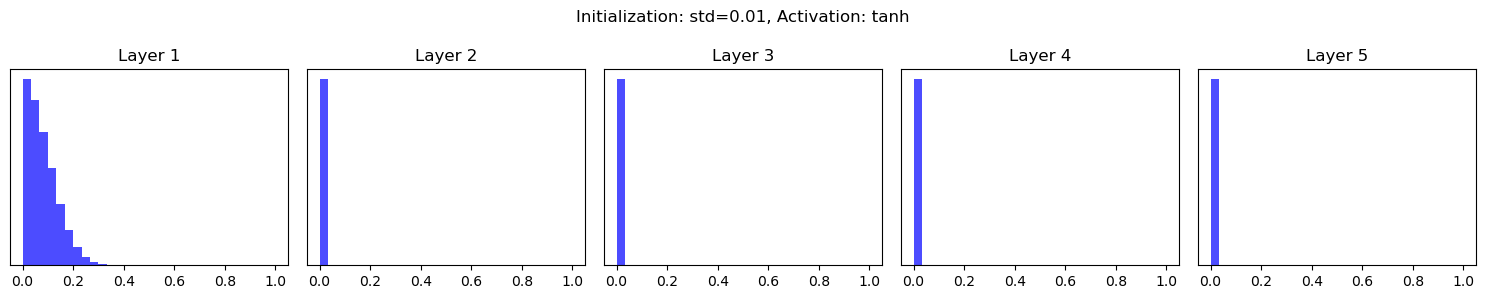

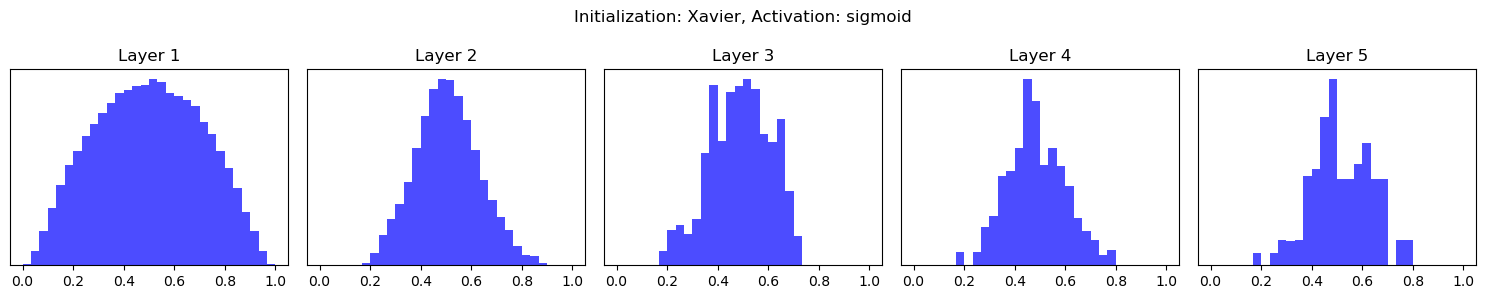

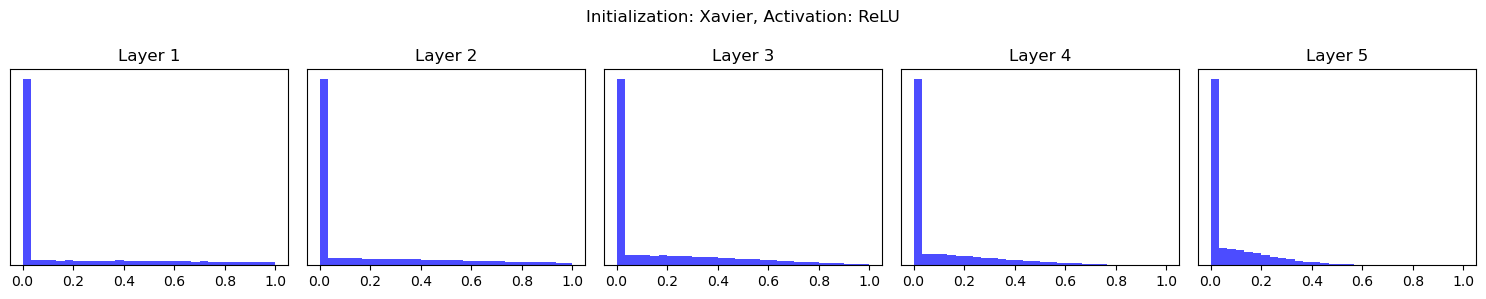

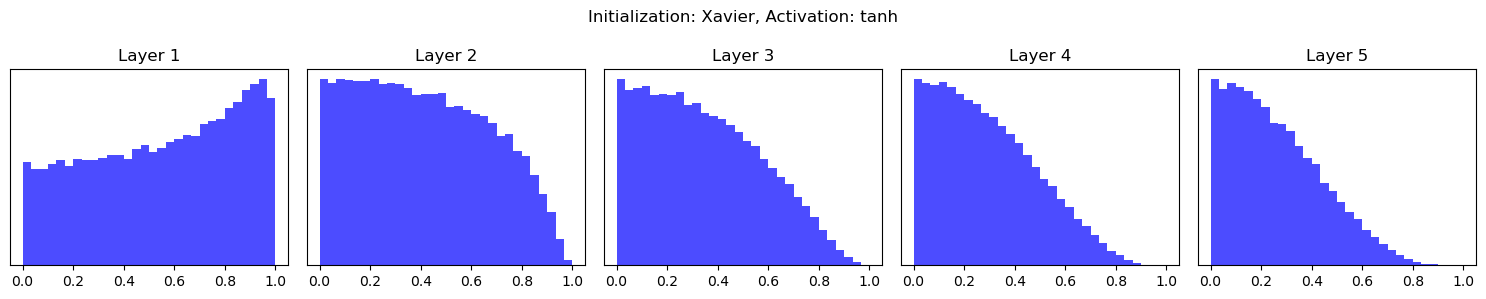

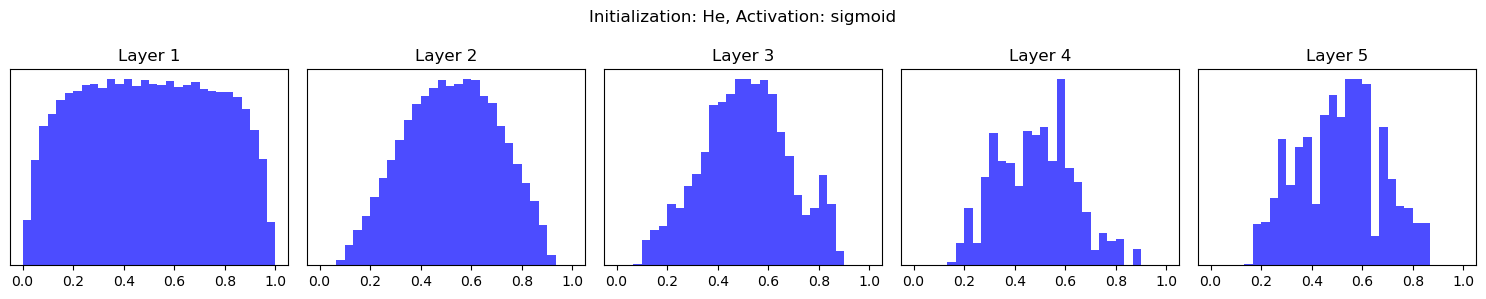

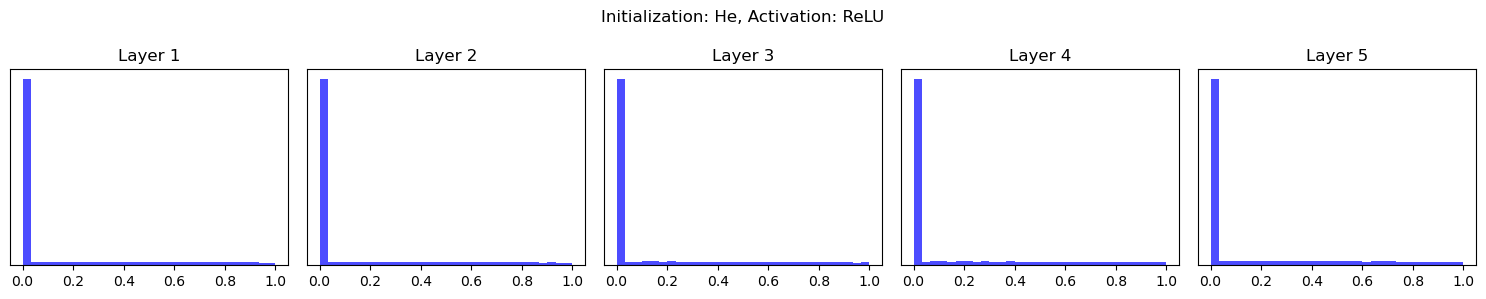

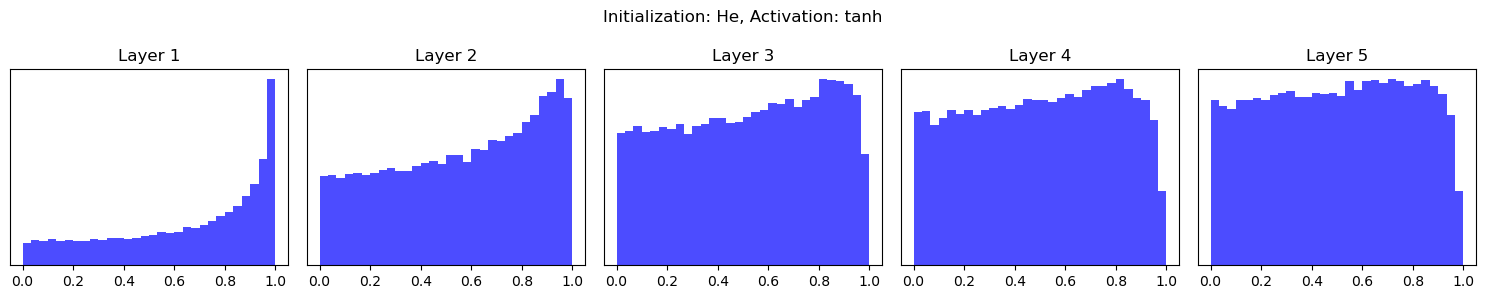

In [65]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

# 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# 설정
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개

# 실험할 초기화 방법과 활성화 함수 정의
initialization_methods = {
    "std=1": lambda: np.random.randn(node_num, node_num) * 1,
    "std=0.01": lambda: np.random.randn(node_num, node_num) * 0.01,
    "Xavier": lambda: np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num),
    "He": lambda: np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
}

activation_functions = {
    "sigmoid": sigmoid,
    "ReLU": ReLU,
    "tanh": tanh
}

# 각 초기화 및 활성화 함수 조합에 대해 레이어별 활성화 분포 시각화
for init_name, init_func in initialization_methods.items():
    for act_name, act_func in activation_functions.items():
        x = input_data
        activations = {}

        for i in range(hidden_layer_size):
            if i != 0:
                x = activations[i - 1]

            # 초기화와 활성화 함수 적용
            w = init_func()
            a = np.dot(x, w)
            z = act_func(a)

            activations[i] = z

        # 그래프 생성
        fig, axes = plt.subplots(1, hidden_layer_size, figsize=(15, 3))
        fig.suptitle(f"Initialization: {init_name}, Activation: {act_name}")

        # 각 레이어의 히스토그램 그리기
        for i in range(hidden_layer_size):
            ax = axes[i]
            ax.hist(activations[i].flatten(), bins=30, range=(0, 1), color='b', alpha=0.7)
            ax.set_title(f"Layer {i+1}")
            ax.set_yticks([])

        plt.tight_layout(rect=[0, 0, 1, 1])  # 제목을 위한 여백 조정
        plt.show()


~~각주 처리된 걸 하나하나 그리기 싫다는 강력한 의지의 코드~~   
   좀 바보같긴한데 그래프 설명이 아래에 있는 게 아니라 위에있음
정리하자면 초기 상태에서 다음과 같은 변화를 만들었다

### 가중치를 표준편차가 0.01인 정규분포로 초기화
std = 0.01인 부분을 보면 되는데 sigmoid 사용 시 0.5 부근에 집중되었다.   막말로 0과 1은 아니라서 기울기 소실은 없으나  다수의 뉴런이 거의 같은 값을 출력하는 것은 여전히 문제다.(`표현력 제한` 문제)

### Xavier 초깃값
Initialization: Xavier인 부분을 보면 되겠다.   
Xavier의 아이디어는 각 Layer의 활성화값을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾자는 것.   
#### 수식적 이해
Xavier초기화는 각 층의 가중치를 mean = 0, variance = $\frac{1}{fan\_in}$ 인 정규분포를 따르도록 설정하는 방법.
- fan_in:해당 층으로 들어오는 노드 수
$$ W \sim N(0,\frac{1}{fan\_in})$$
다르게 표현하면 앞 계층의 노드가 n개면 표준편차가 $\frac{1}{\sqrt{n}}$ 인 분포.
층이 깊어지면 형태가 찌그러지긴 하지만 넓게 분포된다.

## 2-3. ReLU
`He 초깃값`: ReLU에 특화된 초깃값이라 할 수 있다.   
앞 계층의 노드가 n개일 때 표준편차가 $\sqrt{\frac{2}{n}$인 정규분포,
즉 아래와 같다.

$$ W \sim N(0, \frac{2}{fan\_in})$$

Xavier와 다른 것은 분자가 2가 되는 것뿐인데, 이를 쓰는 것은 ReLU는 음의 영역을 0으로 출력하므로 더 넓게 분포시키고자 그렇게 한다.   
-1 ~ +1이었던 것을 0 ~ 1로 표현하고자 하는 느낌   

해당 부분은 Initialization: He, Activation: ReLU를 보면 되겠다.   

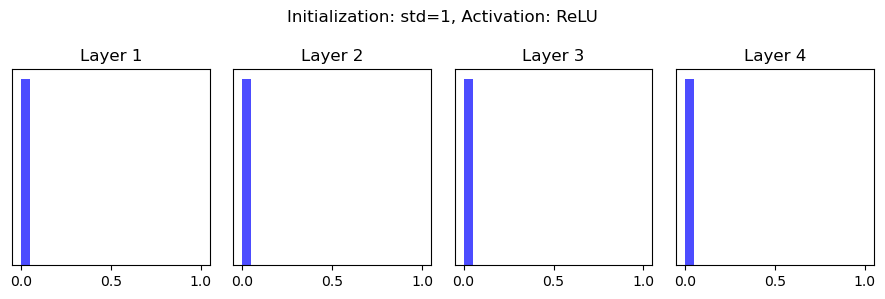

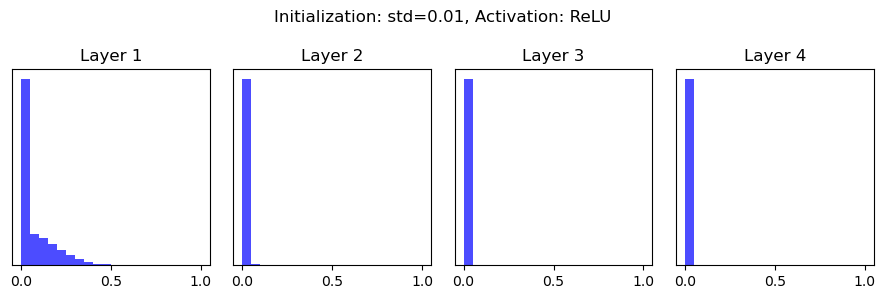

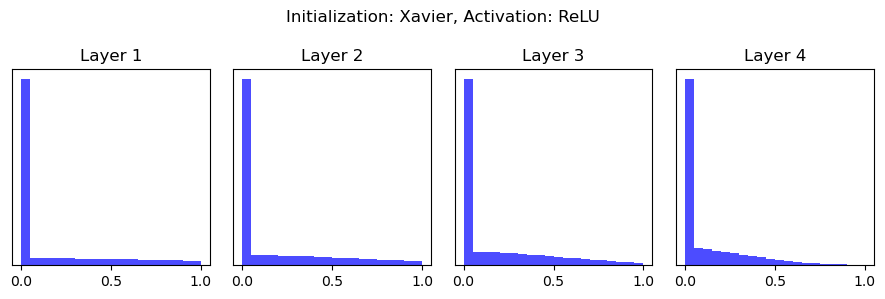

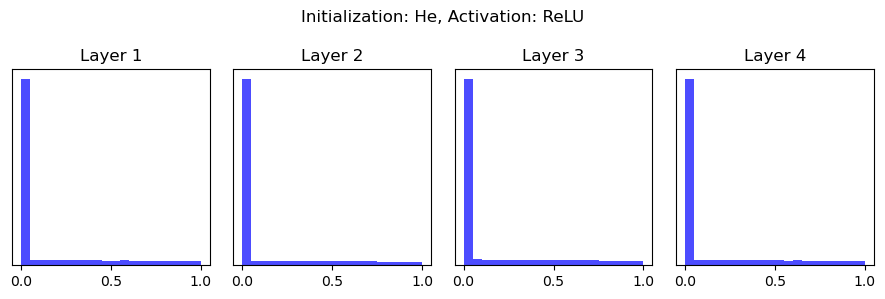

In [82]:
input_data = np.random.randn(1000, 300)  # 1000개의 데이터
node_num = 300  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 4  # 은닉층이 5개

activation_functions = {
    #"sigmoid": sigmoid,
    "ReLU": ReLU,
    #"tanh": tanh
}

for init_name, init_func in initialization_methods.items():
    for act_name, act_func in activation_functions.items():
        x = input_data
        activations = {}

        for i in range(hidden_layer_size):
            if i != 0:
                x = activations[i - 1]

            # 초기화와 활성화 함수 적용
            w = init_func()
            a = np.dot(x, w)
            z = act_func(a)

            activations[i] = z

        # 그래프 생성
        fig, axes = plt.subplots(1, hidden_layer_size, figsize=(9, 3))
        fig.suptitle(f"Initialization: {init_name}, Activation: {act_name}")

        # 각 레이어의 히스토그램 그리기
        for i in range(hidden_layer_size):
            ax = axes[i]
            ax.hist(activations[i].flatten(), bins=20, range=(0, 1), color='b', alpha=0.7)
            ax.set_title(f"Layer {i+1}")
            ax.set_yticks([])

        plt.tight_layout(rect=[0, 0, 1, 1])  # 제목을 위한 여백 조정
        plt.show()


ReLU에서는 He에서 가장 균일하게 분포된 결과.

# 3. 배치 정규화(Batch Normalization)
## 3-1. 배치 정규화 알고리즘
`배치 정규화`의 기본 아이디어는 각 층의 활성화값이 적당히 분포되도록 하는 것이다. 이의 장점은
- 학습 속도 개선
- 초기값 의존도 Down
- 오버피팅 억제
이는 수식적으로 다음과 같이 전개된다.

1. Calculate mean of Mini-batch
$$\mu_{B} = \frac{1}{m}\sum_{i=1}^{m}x_{i}$$
- m: size of mini-batch
   
2. Calculate variance of Mini-bach
$$\sigma_{B}^{2} = \frac{1}{m}\sum_{i=1}^{m}(x_{i}-\mu_{B})^2$$
3. Normalization

$$ \hat{x_{i}} = \frac{x_{i} - \mu_{B}}{\sqrt{\sigma_{B}^{2} + \epsilon}} $$

4. Scaling and Shifting
$$y_{i} = \gamma \hat{x_{i}} + \beta$$
- $\gamma, \beta$: 스케일과 쉬프트 파라미터
- $\gamma$가 확대를, $\beta$가 이동을 담당한다.

#### 전체 수식
$$y_{i} = \gamma \frac{x_{i} - \mu_{B}}{\sqrt{\sigma_{B}^{2} + \epsilon}} + \beta$$   
책에서는 3번과 4번 순서가 뒤집어져있지만 괜찮음

## 3-2. 배치 정규화의 효과
MNIST에서 적용하면 학습 속도가 빨라진다고 함.

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
============== 1/16 ==============
epoch:0 | 0.092 - 0.106
epoch:1 | 0.097 - 0.11
epoch:2 | 0.097 - 0.132
epoch:3 | 0.097 - 0.16


/home/max/DL-from-scratch/common/multi_layer_net_extend.py:132: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/home/max/DL-from-scratch/common/multi_layer_net_extend.py:132: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:4 | 0.097 - 0.186
epoch:5 | 0.097 - 0.201
epoch:6 | 0.097 - 0.221
epoch:7 | 0.097 - 0.236
epoch:8 | 0.097 - 0.249
epoch:9 | 0.097 - 0.264
epoch:10 | 0.097 - 0.279
epoch:11 | 0.097 - 0.287
epoch:12 | 0.097 - 0.306
epoch:13 | 0.097 - 0.333
epoch:14 | 0.097 - 0.331
epoch:15 | 0.097 - 0.331
epoch:16 | 0.097 - 0.367
epoch:17 | 0.097 - 0.361
epoch:18 | 0.097 - 0.385
epoch:19 | 0.097 - 0.392
============== 2/16 ==============
epoch:0 | 0.099 - 0.114
epoch:1 | 0.097 - 0.111


/tmp/ipykernel_41605/3979778605.py:86: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


epoch:2 | 0.097 - 0.126
epoch:3 | 0.097 - 0.146
epoch:4 | 0.097 - 0.179
epoch:5 | 0.097 - 0.204
epoch:6 | 0.097 - 0.233
epoch:7 | 0.097 - 0.258
epoch:8 | 0.097 - 0.277
epoch:9 | 0.097 - 0.299
epoch:10 | 0.097 - 0.342
epoch:11 | 0.097 - 0.356
epoch:12 | 0.097 - 0.375
epoch:13 | 0.097 - 0.401
epoch:14 | 0.097 - 0.413
epoch:15 | 0.097 - 0.429
epoch:16 | 0.097 - 0.446
epoch:17 | 0.097 - 0.47
epoch:18 | 0.097 - 0.487
epoch:19 | 0.097 - 0.504
============== 3/16 ==============
epoch:0 | 0.123 - 0.103
epoch:1 | 0.424 - 0.135
epoch:2 | 0.515 - 0.17
epoch:3 | 0.615 - 0.212
epoch:4 | 0.672 - 0.252
epoch:5 | 0.749 - 0.283
epoch:6 | 0.797 - 0.322
epoch:7 | 0.829 - 0.363
epoch:8 | 0.85 - 0.399
epoch:9 | 0.879 - 0.422
epoch:10 | 0.899 - 0.458
epoch:11 | 0.923 - 0.483
epoch:12 | 0.936 - 0.505
epoch:13 | 0.946 - 0.517
epoch:14 | 0.95 - 0.543
epoch:15 | 0.959 - 0.563
epoch:16 | 0.968 - 0.58
epoch:17 | 0.972 - 0.598
epoch:18 | 0.98 - 0.611
epoch:19 | 0.98 - 0.621
============== 4/16 ==============
epoch

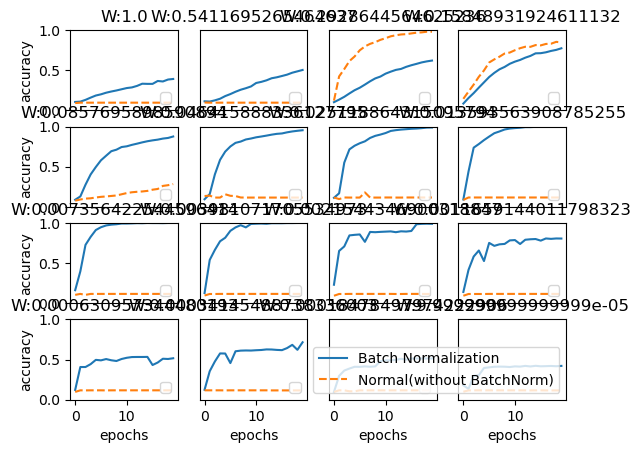

In [7]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)# 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
sys.path.append(os.path.abspath("../common"))
from multi_layer_net_extend import MultiLayerNetExtend
from optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

ModuleNotFoundError: No module named 'common.multi_layer_net_extend'